# Credit Card Fraud Detection

In [1]:
# This cell consists of the imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from scipy.stats import norm
import warnings

warnings.simplefilter('ignore')

Let's first import the data

In [2]:
# Importing the data using pandas
data=pd.read_csv('creditcard.csv')
print(data.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

The shape of the imported data is

In [3]:
print(data.shape)

(284807, 31)


We have 284807 observations and 31 variables. Let us have look at the features in the data

In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


From the above list of features, we find that we have 28 confidential ones. In our problem, we define **class** as the target variable. Let us find the description of the observed data

In [5]:
print(data.describe().transpose())

           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.165980e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.373150e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.086869e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.490107e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.177556e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406455e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239751e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.254995e-15      0.

To proceed with the analysis, let us first check the percentage of fraud and regular transactions

In [6]:
fraud_percentage=data[data['Class']==1]['Class'].count()/data.shape[0]*100
regular_percentage=data[data['Class']==0]['Class'].count()/data.shape[0]*100
print('Fraud Percentage: ',fraud_percentage,' %\nRegular Percentage: ',regular_percentage,' %')

Fraud Percentage:  0.1727485630620034  %
Regular Percentage:  99.82725143693798  %


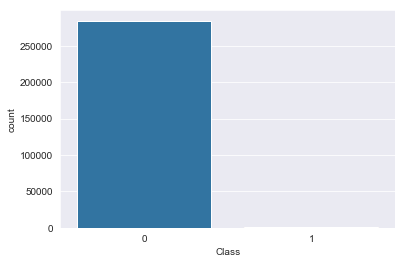

In [7]:
sns.set_style('darkgrid')
sns.countplot('Class',data=data)

We see that the cases are imbalanced. Thus, to train an unbiased model we need to balance the cases. Let's look at this problem after a moment. Right now, let us have a look at the distribution of transaction amount and time from the data

Text(0.5, 1.0, 'Transaction Amount Distrbution')

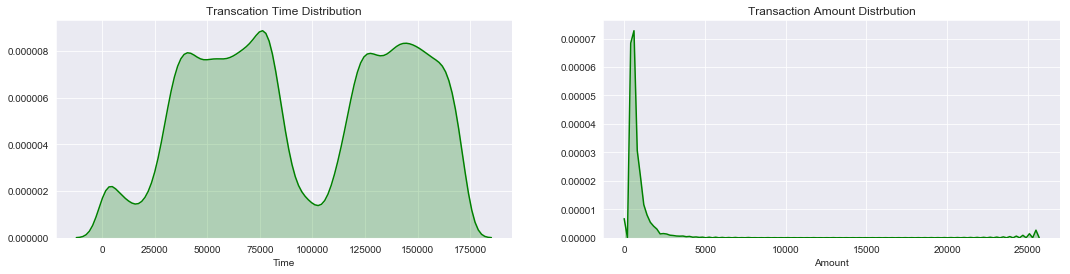

In [8]:
fig,ax=plt.subplots(1,2,figsize=(18,4))

sns.distplot(data['Time'], hist=False, color="g", kde_kws={"shade": True},ax=ax[0])
ax[0].set_title('Transcation Time Distribution')
sns.distplot(data['Amount'], hist=False, color="g", kde_kws={"shade": True}, ax=ax[1])
ax[1].set_title('Transaction Amount Distrbution')

From the data description, we find the need for scaling the data (**Time and Amount**). Since all the other features are already scaled, we are left with only two features.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data['Amount_Scaled']=scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time_Scaled']=scaler.fit_transform(data['Time'].values.reshape(-1,1))

print(data[['Amount_Scaled','Time_Scaled']].head(5))

   Amount_Scaled  Time_Scaled
0       0.244964    -1.996583
1      -0.342475    -1.996583
2       1.160686    -1.996562
3       0.140534    -1.996562
4      -0.073403    -1.996541


In [10]:
data.drop(columns=['Time','Amount'],inplace=True)
print(data.head(2))

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Class  Amount_Scaled  Time_Scaled  
0 -0.189115  0.133558 -0.021053      0       0.244964    -1.996583  
1  0.125895 -0.008983  0.014724      0      -0.342475    -1.996583  

[2 rows x 31 columns]


From the literature, we find that random undersampling and oversmapling yield poor results in imbalanced data. So, in order to avoid those errors, It followed the SMOTE approach. It is known as Synthetic Minority Oversampling Technique. It creates synthetic data points from the minority class data using a k-means approach. Also, we must note that the validation dataset must remain pure throughout our analysis. So, the oversmapling technique must be applied after we split the data into test and training sets 

In the bext step, I am trying to incorporate Grid Search Cross Validation into SMOTE by building pipeline from the imblearn library. This ensures that the above mentioned point is satisfied. But first, we must decide on the classifiers we are going to use in our model. I am going with Logistic Regression, K-Nearest Neighbors, Support Vector Classifer and Random Forest Classifier

In [11]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

X=data.drop(['Class'],axis=1)
y=data['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Length of X_train: ',len(X_train))
print('Length of X_test: ',len(X_test))

Length of X_train:  227845
Length of X_test:  56962


Let us import the modules related to our classifiers and set their parameters ready for grid search cross validation

In [12]:
# Importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Setting the paarmeters for each model for grid search CV

logreg__params={'logreg__penalty':['l1','l2']}
knn__params={'knn__n_neighbors':list(range(3,10))}
svc__params={'svc__C':[0.01,0.1,0.5,1,2,5,10,50,100],'svc__kernel':['rbf','sigmoid']}
rfc__params={'rfc__criterion':['gini','entropy'],'rfc__max_depth':list(range(3,7)),'rfc__max_features':['auto','sqrt','log2']}

Now let us build the pipeline to carry out SMOTE effectively and efficiently

In [14]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Logistic Regression
log_pipeline=Pipeline([('smt',SMOTE()),('logreg',LogisticRegression())])
log_pipeline.fit(X_train,y_train)
log_pred=log_pipeline.predict(X_test)
print(classification_report(y_test,log_pred))

Using TensorFlow backend.


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.06      0.91      0.11       100

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [15]:
# Computing the average precision score
from sklearn.metrics import average_precision_score

log_score=log_pipeline.decision_function(X_test)
log_avg=average_precision_score(y_test,log_score)
print('Avergae Precision Score for Logistic Regression: ',log_avg)

Avergae Precision Score for Logistic Regression:  0.7184706437147043


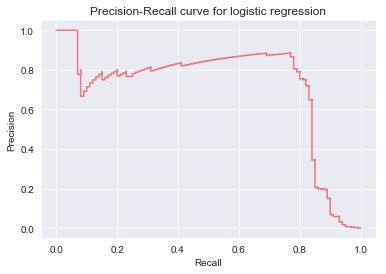

In [28]:
# Plotting the precision recall curve
from sklearn.metrics import precision_recall_curve

precision,recall,threshold=precision_recall_curve(y_test,log_score)
plt.step(recall,precision,color='r',alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for logistic regression')
plt.show()

Text(0.5, 1.0, 'Precision/Recall vs Threshold for Logistic Regression')

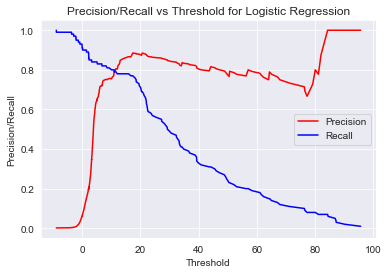

In [31]:
# Precision/Recall vs Threshold

plt.plot(threshold,precision[:-1],color='r',label='Precision')
plt.plot(threshold,recall[:-1],color='b',label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.title('Precision/Recall vs Threshold for Logistic Regression')

With the presence of a good amount of area under the curve, we can classify the logistic regression classifier as a good one. It has good recall and precision at various classification thresholds. Now let's look at KNN

In [17]:
# KNN

knn_pipeline=Pipeline([('smt',SMOTE()),('knn',KNeighborsClassifier())])
knn_pipeline.fit(X_train,y_train)
knn_pred=knn_pipeline.predict(X_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.49      0.85      0.62       100

    accuracy                           1.00     56962
   macro avg       0.74      0.92      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
# Average Precision Score

knn_score=knn_pipeline.predict_proba(X_test)[:,1]
knn_avg=average_precision_score(y_test,knn_score)
print('Average precision score of KNN: ',knn_avg)

Average precision score of KNN:  0.602539945334062


Text(0.5, 1.0, 'Precision-Recall curve for KNN')

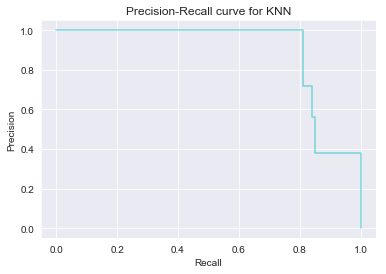

In [32]:
# Plotting the rpecision recall curve

precision,recall,threshold=precision_recall_curve(y_test,knn_score)
plt.step(recall,precision,color='c',alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN')

Text(0.5, 1.0, 'Precision/Recall vs Threshold for KNN')

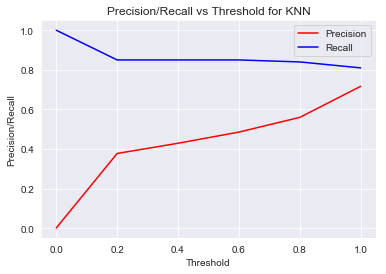

In [33]:
# Precision/Recall vs Threshold

plt.plot(threshold,precision[:-1],color='r',label='Precision')
plt.plot(threshold,recall[:-1],color='b',label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.title('Precision/Recall vs Threshold for KNN')

Since KNN does not depend on classification threshold like logistic regression, it is meaningless to plot a precision-recall curve since it consists of only two points. One could attempt to develop a function to plot the curve using the fraction of neighbors as the classification threshold in the future

In [20]:
# SVM

svc_pipeline=Pipeline([('smt',SMOTE()),('svc',svm.SVC())])
svc_pipeline.fit(X_train,y_train)
svc_pred=svc_pipeline.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.41      0.74      0.53       100

    accuracy                           1.00     56962
   macro avg       0.70      0.87      0.76     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
# Computing the average precision score

svc_score=svc_pipeline.decision_function(X_test)
svc_avg=average_precision_score(y_test,svc_score)
print('Average Precision Score of SVM: ',svc_avg)

Average Precision Score of SVM:  0.6194725493645982


Text(0.5, 1.0, 'Precision-Recall curve for SVM')

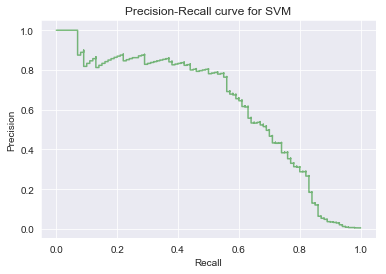

In [34]:
# Plotting the precision-recall curve

precision,recall,threshold=precision_recall_curve(y_test,svc_score)
plt.step(recall,precision,color='g',alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for SVM')

Text(0.5, 1.0, 'Precision/Recall vs Threshold for SVM')

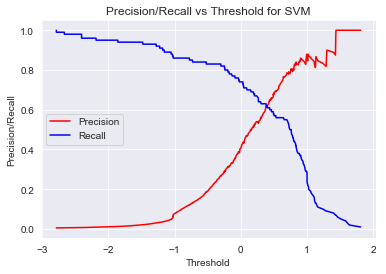

In [36]:
# Precision/Recall vs Threshold

plt.plot(threshold,precision[:-1],color='r',label='Precision')
plt.plot(threshold,recall[:-1],color='b',label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.title('Precision/Recall vs Threshold for SVM')

From the stats, we can make out that the SVM doesn't do very well on this case. We need to make sure that our recall is very high since it's very expensive to have more False Negatives. With high number of False Negatives, we run the risk of classifying fraudulent transactions as non-fraudulent. Now, let us try fitting random forests model to the data

In [23]:
# Random Forests
from sklearn.metrics import recall_score, make_scorer

rfc_pipeline=Pipeline([('smt',SMOTE()),('rfc',RandomForestClassifier())])
rfc_grid=GridSearchCV(rfc_pipeline,rfc__params,scoring='recall')
rfc_grid.fit(X_train,y_train)
print(rfc_grid.best_estimator_)

Pipeline(memory=None,
         steps=[('smt',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features='log2',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                     

In [24]:
rfc_pred=rfc_grid.best_estimator_.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.38      0.84      0.52       100

    accuracy                           1.00     56962
   macro avg       0.69      0.92      0.76     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
# Compuating the average precision score

rfc_score=rfc_grid.best_estimator_.predict_proba(X_test)[:,1]
rfc_avg=average_precision_score(y_test,rfc_score)
print('Averge Precision Score of Random Forest Classifier: ',rfc_avg)

Averge Precision Score of Random Forest Classifier:  0.707928208989903


Text(0.5, 1.0, 'Precision-Recall curve for Random Forests Classifier')

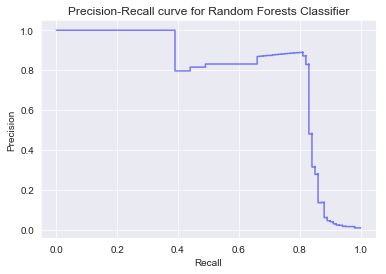

In [37]:
# Plotting the precision recall curve

precision,recall,threshold=precision_recall_curve(y_test,rfc_score)
plt.step(recall,precision,color='b',alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Random Forests Classifier')

Text(0.5, 1.0, 'Precision/Recall vs Threshold for Random Forests')

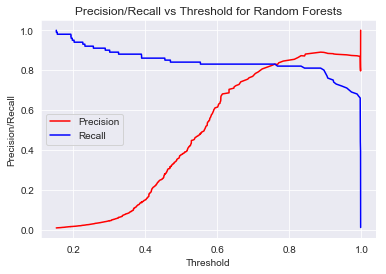

In [38]:
# Precision/Recall vs Threshold

plt.plot(threshold,precision[:-1],color='r',label='Precision')
plt.plot(threshold,recall[:-1],color='b',label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.title('Precision/Recall vs Threshold for Random Forests')

Now, let us look at the confusion matrices to end the discussion. This will give us a clear picture of the test results we have obtained from the model.

In [39]:
from sklearn.metrics import confusion_matrix

log_cm=confusion_matrix(y_test,log_pred)
knn_cm=confusion_matrix(y_test,knn_pred)
svc_cm=confusion_matrix(y_test,svc_pred)
rfc_cm=confusion_matrix(y_test,rfc_pred)

Text(0.5, 1.0, 'Logistic Regression')

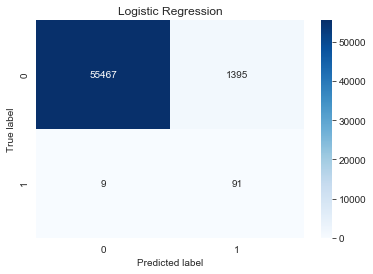

In [58]:
# Confusion Matrix - Logistic Regression

sns.heatmap(log_cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Logistic Regression')

Text(0.5, 1.0, 'KNN')

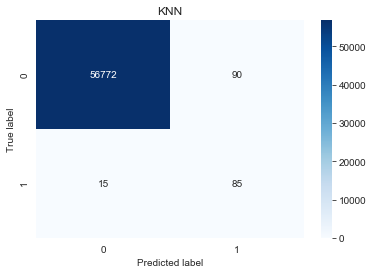

In [59]:
# Confusion Matrix - KNN

sns.heatmap(knn_cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('KNN')

Text(0.5, 1.0, 'SVM')

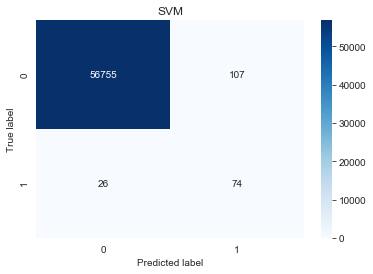

In [60]:
# Confusion Matrix - SVM

sns.heatmap(svc_cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SVM')

Text(0.5, 1.0, 'Random Forests')

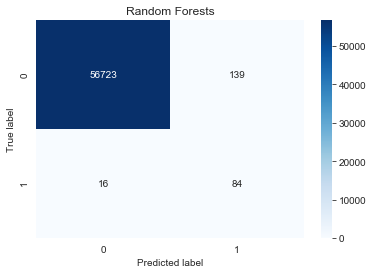

In [61]:
# Confusion Matrix - Random Forests

sns.heatmap(rfc_cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Random Forests')

From the confusion matrices for different models, it is clear that logistic regression has the least number of False Negatives. Since our aim is to identify fraudulent transaction accurately i.e. to decrease the number of false negatives, we can say that the logistic regression model is the best performing one. 